#TensorFlow
TensorFlow-> Powerful Deep Learning library for python.(Open Source)
Google AI team-(Google AI)

TensorFlow-> An end-to-end open source framework for deep learning that works with python.

Tensors-> Multi-dimensional data arrays
Flow-> Numerical computations via graphs(data Flow)

A flow of tensors which is fundamental to the working of a neural network.

# Tensors
1. Linear Algebra
2. vector calculas
3. Python syntax

Tensors are object that describes a relationship between algebric objects and vector spaces associated to them.

For Tensors we need n^r where r is the rank of a tensor.



# Neural Networks
1. NN is a pathway to Artificial intelligence using Deep Learning

2. Artificial Neural Networks (ANNs) are inspired from the neurons present in the neurons present in the human body.

3. Neural avtivations is based on circumstances which in turn allows for response and actions

Each neurons receives multiplied version of inputs and random weights which is added with the bias value.
Later, this is passed through an activation function that gives the neurons its final value.

Weights->
1. weights are values that get multiplied with the inputs for the neurons
2. They are used later during backpropagation to reduce the loss.
3. Weights are adjustable depending on the training input and the prediction outcome variation.

# TensorFlow code writing process

1. Creating the computational grapg from tensors
2. Running the graph to denote graph operations

In [ ]:
#Creating the computational grapg from tensors
import tensorflow as tf
import numpy as np

x=tf.constant(10.0)
y=tf.constant(15.0)
z=x+y
print(z)

tf.Tensor(25.0, shape=(), dtype=float32)


# MNIST Character Recognition with TensorFlow
1. Digit classification using the MNIST dataset


In [ ]:
#1. Load TensorFlow
import tensorflow as tf
import numpy as np

#2. load MNIST dataset and convert sames to floating point numbers from integers
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

#3. Build the model, choose an optimizer and the loss function
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)])

#4. Take a look at what the model is doing in terms of outputs - vectors:
predictions = model(x_train[:1]).numpy()
predictions

#5. We need the probability of each class instead of the vectors
tf.nn.softmax(predictions).numpy() #softmax->

#6. Finding the scalar loss for each example:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

#7. Model Compilation
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

#8. Model fitting to the minimize the loss
model.fit(x_train, y_train, epochs=5)

#9. Model Evaluation
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2965 - accuracy: 0.9140
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1418 - accuracy: 0.9585
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1048 - accuracy: 0.9682
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0864 - accuracy: 0.9736
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0741 - accuracy: 0.9775
313/313 - 1s - loss: 0.0782 - accuracy: 0.9761 - 934ms/epoch - 3ms/step


[0.07817672938108444, 0.9761000275611877]

Only doing epoch will not work as it will bring the concept overfitting and underfitting.

#2. Image classification using CNNs
1. Convolution layer - Converts image into an array
--- first layer of a convolutional neral network
--- stores the pixel values of image into an array
--- used for extracting the features of the image and reducing its dimention.
2. ReLu layer - Regularization used to vonvert negative numbers to zero
--- regularization used to convert negative numbers to zero
3. pooling Layer - Used for reduction of the input image size with filters
--- used to reduce the spatial size and the number of parameters
--- to reduce dimentionality
--- helps to control overfitting
--- filters of the size 2*2 are commonly used in it
4. Fully connected layer- Combines features and produces a model.
--- Combines all the features togather to create a final model
--- final step in the process of a Convolutional Neural Network.

In [ ]:
#1. import training and testing dataset
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

#2. Unzipping the compressed dataset
!unzip training_set.zip
!unzip test_set.zip

In [ ]:
#3. Printing a sample image of a cat
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as npimg
img = npimg.imread('/content/training_set/training_set/cats/cat.10.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# Printing a sample image of a dog
img = npimg.imread('/content/training_set/training_set/dogs/dog.100.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
 #4. Import Libraries
import tensorflow
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
#5. Parameter initialization
# Initialize the paramaters

image_width, image_height = 150,150
train_data_dir = r"/content/training_set"
validation_data_dir = r"/content/test_set"
nb_train_sample = 100
nb_validation_sample = 100
epochs = 20 # repeating a proper cycle
batch_size = 20 # model will not learn from the whole dataset


In [ ]:
# Checking the shapes of the images
# Images data is represented by a #D array:[rows][cols][channels]in a channel last representation. Channels are the first dimmention in channel first representation
# 150*150*3

import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
  input_shape = (3, image_width, image_height)
else:
  input_shape = (image_width, image_height, 3)

In [ ]:
# Generate image to train the model
train_datagen = ImageDataGenerator(rescale=1. /255, shear_range = 0.2, zoom_range=0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_genarator = train_datagen.flow_from_directory(train_data_dir, target_size = (image_width, img_height), batch_size=batch_size, class_mode = 'binary', classes=['cat', 'dogs'])

validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size = (image_width, img_height), batch_size = batch_size, class_mode='binary')

Found 0 images belonging to 2 classes.
Found 2023 images belonging to 1 classes.


IndexError: ignored

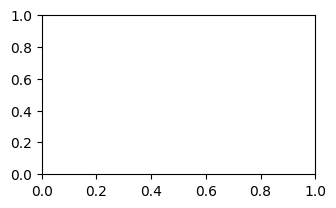

In [ ]:
# Visual representation of ImageDataGenerator

plt.figure(figsize=(12,12))
for i in range(0,15):
  plt.subplot(5,3,i+1)
  for X_batch, Y_batch in train_genarator:
    image = X_batch[0]
    plt.inshow(image)
    break
plt.tight_layout()
plt.show()

In [ ]:
#Build the basic CNN model 0

model = Sequential()
model.add(Conv2D(64,(3,3), input_shape = input_shape)) #64 neurons with 3*3 filter
#This class allows to create convolutional neural network to extract features from the images

model.add(Activation('relu'))
model.add(Maxpooling2D(pool_size=(2,2))) # MaxPooling2D helps to reduce the size of the data

model.add(Flatten())# Converts multi dimentional array to 10 channel
model.add(Dense(64))#64 neurons with 3*3 filter
# numbers of output nodes in the hidden layers

model.add(Activation('relu'))
model.add(Dense(1)) #Output layer
model.add(Activation('sigmoid'))#sigmoid activation function
model.summary()

In [ ]:
#Compile the basic CNN model
model.compile(optimizer = 'rnsprop', loss = 'binary_crossentropy', matrics = ['accuracy'])
model.summary()

#Fit the basic CNN model
training = model.fit_generator(train-generator, steps_per_epoch-nb_train_sample, epoch-epochs, validation_data-validaton_generator, validation-steps-nb_validaton_samples)


In [ ]:
#Find the accuracy score
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.key())

#summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_acccuracy'])
plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test']), loc = 'upper left')
plt.show()

#summarize training for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test']), loc = 'upper left')
plt.show()

In [ ]:
#predict the image

from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("", target_size=(150,150))

img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img-pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt [0][0]==1:
  prediction = 'Dog'
else:
  prediction = 'cat'
  print('predict:', prediction)

  img-mpimg.imread('')
  implot = plt.imshow(img)
  plt.show